In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

unemployment = pd.read_csv("./Downloads/Unemployment_Rate_M_Urban_recent.txt" , sep = "," , skiprows =1 )


In [2]:
unemployment.columns = unemployment.columns.str.strip()
unemployment['Date'] = pd.to_datetime(unemployment["Date"])


In [3]:
unemployment['month'] = pd.DatetimeIndex(unemployment['Date']).month
unemployment['year'] = unemployment['Date'].apply(lambda x:x.strftime('%Y'))


In [4]:
def identify(row):
    UT = ['Delhi', 'Chandigarh', 'Puducherry']
    if row['Region'] =='India':
        global V
        V = 'India Urban'
    elif row['Region'] == 'Delhi' or row['Region'] == 'Chandigarh' or row['Region'] == 'Puducherry' or row['Region'] == "Jammu & Kashmir":
        V = 'UTs'
    else:
        V = 'States'
    return V
        
unemployment['new_region'] = unemployment.apply(identify , axis =1)


In [5]:
grouped =unemployment.groupby(['new_region' , 'year' , 'month']).mean()
grouped = grouped.reset_index()

In [6]:
#unemployment['month'] = pd.DatetimeIndex(unemployment['Date']).month
import calendar
grouped['month'] = grouped['month'].apply(lambda x: calendar.month_abbr[x])



In [7]:
x_labels = grouped['month'].astype(str) + grouped['year'].astype(str)



<IPython.core.display.Javascript object>


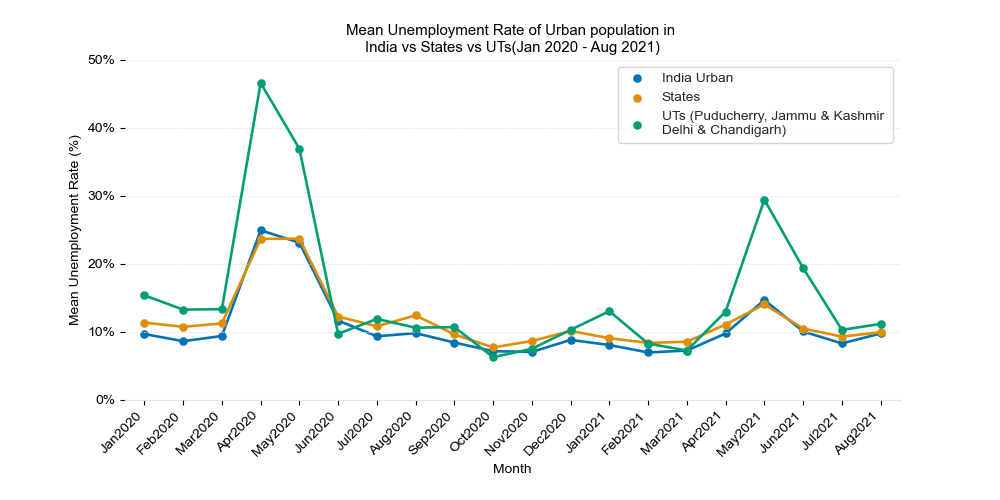

<ipython-input-8-3a9387db5ed8>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabs)


[Text(0, 0.0, '0%'),
 Text(0, 10.0, '10%'),
 Text(0, 20.0, '20%'),
 Text(0, 30.0, '30%'),
 Text(0, 40.0, '40%'),
 Text(0, 50.0, '50%')]

In [8]:
import seaborn as sns
fig = plt.figure(figsize = (10,5))

sns.pointplot(x = x_labels, y = 'Estimated Unemployment Rate (%)' , hue = 'new_region', data = grouped, palette = "colorblind", scale = 0.7)

# Aesthetics
sns.set_style("white", {'font-family': [u'Arial']})
sns.set_context('notebook', font_scale=.90)

sns.despine(left = True)
plt.xlabel('Month')
plt.ylabel('Mean Unemployment Rate (%)')
plt.title('Mean Unemployment Rate of Urban population in \nIndia vs States vs UTs(Jan 2020 - Aug 2021)')

plt.gca().spines['bottom'].set_color('#e1e1e1')
plt.gca().spines['bottom'].set_linestyle('--')
fig.autofmt_xdate(rotation = 45)
plt.gca().set_ylim(0,50)
#plt.gca().set_yticks(range(0,50,5))
plt.gca().yaxis.grid(which = 'major', color = '#e1e1e1', linestyle = '--', linewidth = 0.5)

# Customize legend
plt.legend(title='Regions')
plt.legend().get_texts()[2].set_text('UTs (Puducherry, Jammu & Kashmir \nDelhi & Chandigarh)')

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)

